[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yassi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


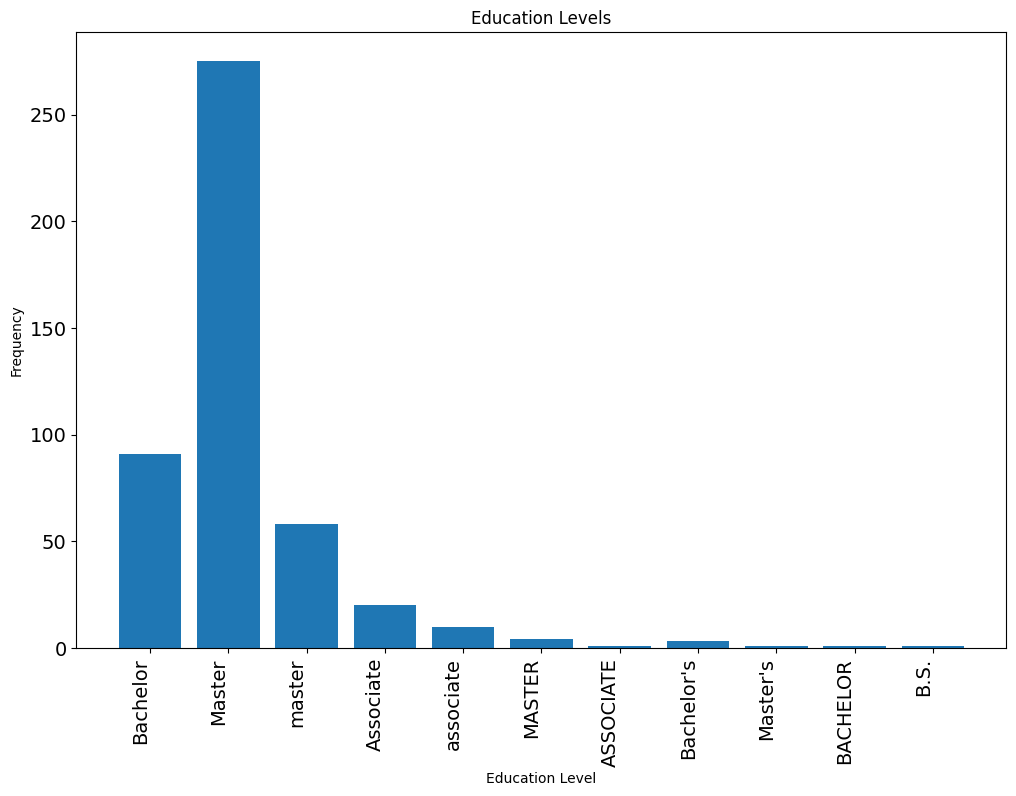

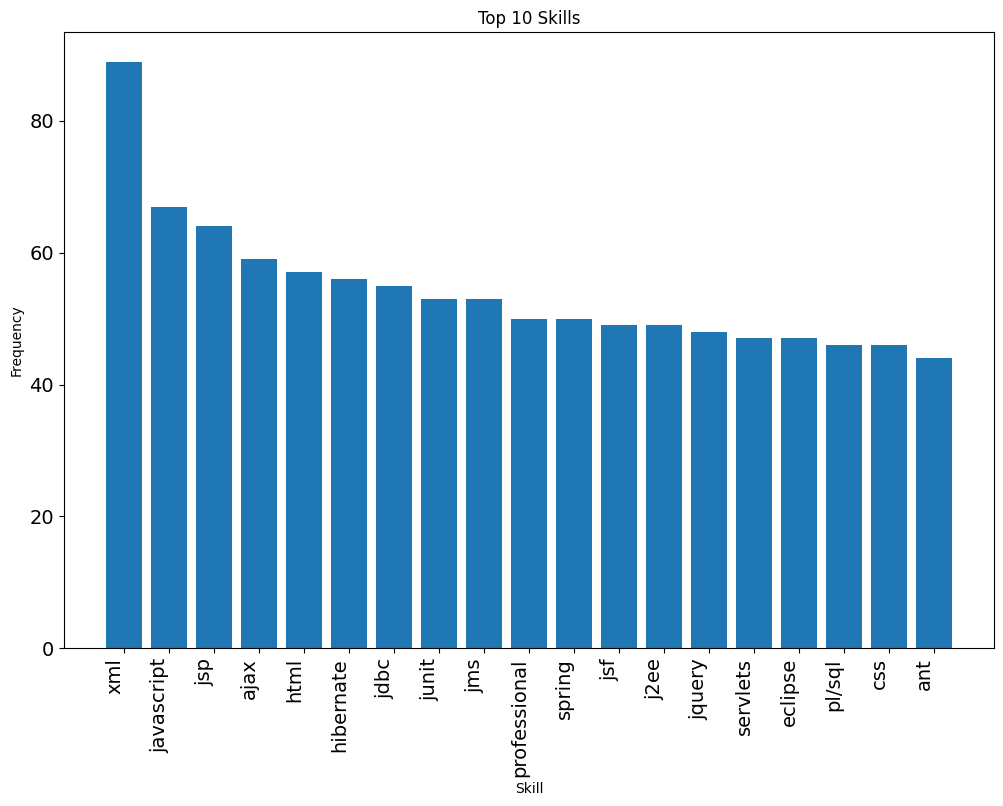

In [6]:
import fitz  # PyMuPDF
import re
import os
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to extract text from PDF
def extract_text_from_pdf(pdf_path):
    document = fitz.open(pdf_path)
    text = ""
    for page_num in range(len(document)):
        page = document.load_page(page_num)
        text += page.get_text()
    return text

# Function to extract information from text
def extract_information(text):
    education_levels = []
    skills = []

    # Extract education levels
    education_patterns = [
        r'\b(Bachelor\'s|Master\'s|PhD|Associate\'s|High School Diploma)\b',
        r'\b(B\.S\.|M\.S\.|Ph\.D\.|A\.S\.)\b',
        r'\b(Associate|Bachelor|Master|Doctorate)\b'
    ]
    for pattern in education_patterns:
        matches = re.findall(pattern, text, re.IGNORECASE)
        education_levels.extend(matches)
    
    # Extract skills
    skills_pattern = r'Skills\s*:\s*(.*?)(?:Education|Experience|$)'
    skills_matches = re.findall(skills_pattern, text, re.IGNORECASE | re.DOTALL)
    for match in skills_matches:
        skill_list = re.split(r',|\n|;', match)
        for skill in skill_list:
            skill = skill.strip().lower()
            if skill and skill not in stop_words and skill != '.':
                skills.append(skill)

    return education_levels, skills

# Function to process all PDFs in a folder and aggregate information
def process_pdfs(folder_path):
    all_education_levels = []
    all_skills = []

    for filename in os.listdir(folder_path):
        if filename.endswith(".pdf"):
            pdf_path = os.path.join(folder_path, filename)
            text = extract_text_from_pdf(pdf_path)
            education_levels, skills = extract_information(text)
            all_education_levels.extend(education_levels)
            all_skills.extend(skills)
    
    return all_education_levels, all_skills

# Function to plot bar charts
def plot_bar_chart(data, title, xlabel, ylabel, top_n=None, remove_top=False):
    if top_n:
        data = dict(Counter(data).most_common(top_n))
    else:
        data = dict(Counter(data))
    
    if remove_top:
        # Remove the top skill
        if data:
            top_skill = max(data, key=data.get)
            del data[top_skill]
    
    plt.figure(figsize=(12, 8))
    plt.bar(data.keys(), data.values())
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=90, ha='right', fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

# Example usage
folder_path = 'C:/Users/yassi/Desktop/Final_Project/test/Resumes/pdfs'  
education_levels, skills = process_pdfs(folder_path)

# Plotting
plot_bar_chart(education_levels, 'Education Levels', 'Education Level', 'Frequency')
plot_bar_chart(skills, 'Top 10 Skills', 'Skill', 'Frequency', top_n=20, remove_top=True)

# Save the results to CSV files
education_df = pd.DataFrame(education_levels, columns=['Education Level'])
skills_df = pd.DataFrame(skills, columns=['Skill'])

education_df.to_csv('education_levels.csv', index=False)
skills_df.to_csv('skills.csv', index=False)
